In [1]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('data_class_raw.csv')
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


In [2]:
#define X and y
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']

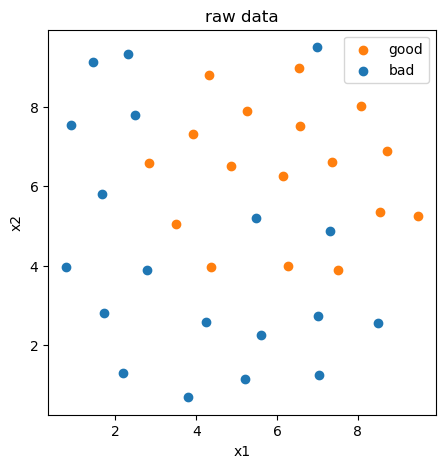

In [3]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
bad = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
good = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
plt.legend((good,bad),('good','bad'))
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
#anomay detection
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(X[y==0])
y_predict_bad = ad_model.predict(X[y==0])
print(y_predict_bad)

ImportError: cannot import name 'issparse' from 'scipy.sparse' (unknown location)

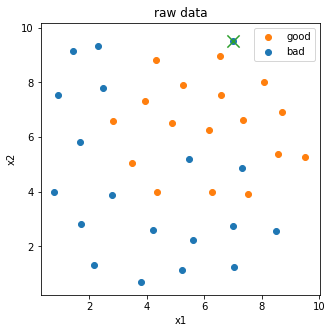

In [5]:
fig2 = plt.figure(figsize=(5,5))
bad = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
good = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
plt.scatter(X.loc[:,'x1'][y==0][y_predict_bad==-1],X.loc[:,'x2'][y==0][y_predict_bad==-1],marker='x',s=150)
plt.legend((good,bad),('good','bad'))
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [6]:
data = pd.read_csv('data_class_processed.csv')
data.head()
#define X and y
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']

[0.5369408 0.4630592]


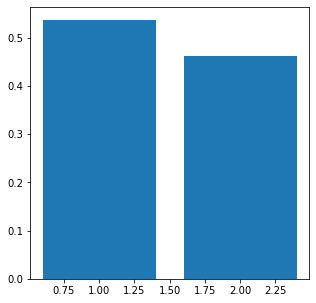

In [7]:
#pca 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_norm = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_norm)
var_ratio = pca.explained_variance_ratio_
print(var_ratio)
fig4 = plt.figure(figsize=(5,5))
plt.bar([1,2],var_ratio)
plt.show()

In [8]:
# train and test split: random_state=4,test_size=0.4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=4,test_size=0.4)
print(X_train.shape,X_test.shape,X.shape)

(21, 2) (14, 2) (35, 2)


In [9]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train,y_train)
y_train_predict = knn_10.predict(X_train)
y_test_predict = knn_10.predict(X_test)

#calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
accuracy_test = accuracy_score(y_test,y_test_predict)
print("trianing accuracy:",accuracy_train)
print('testing accuracy:',accuracy_test)



trianing accuracy: 0.9047619047619048
testing accuracy: 0.6428571428571429


In [10]:
#visualize the knn result and boundary
xx, yy = np.meshgrid(np.arange(0,10,0.05),np.arange(0,10,0.05))
print(yy.shape)

(200, 200)


In [11]:
x_range = np.c_[xx.ravel(),yy.ravel()]
print(x_range.shape)

(40000, 2)


In [12]:
y_range_predict = knn_10.predict(x_range)

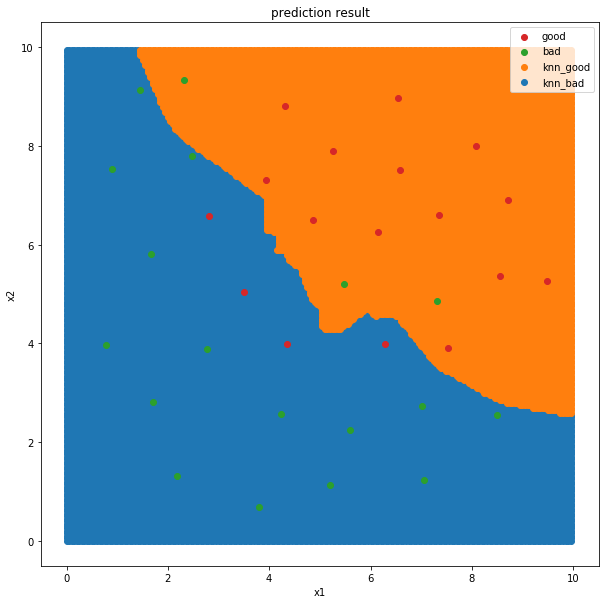

In [13]:
fig4 = plt.figure(figsize=(10,10))
knn_bad = plt.scatter(x_range[:,0][y_range_predict==0],x_range[:,1][y_range_predict==0])
knn_good = plt.scatter(x_range[:,0][y_range_predict==1],x_range[:,1][y_range_predict==1])



bad = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
good = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
plt.legend((good,bad,knn_good,knn_bad),('good','bad','knn_good','knn_bad'))
plt.title('prediction result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_predict)
print(cm)

[[4 2]
 [3 5]]


![confusion_matrix](images/06_confusion_matrix.png)

In [15]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
print(TP,TN,FP,FN)

5 4 2 3


**准确率:** 整体样本中，预测正确样本数的比例
- Accuracy = (TP + TN)/(TP + TN + FP + FN)

In [16]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print(accuracy)

0.6428571428571429


**灵敏度（召回率）:** 正样本中，预测正确的比例
- Sensitivity = Recall = TP/(TP + FN)

In [17]:
recall = TP/(TP + FN)
print(recall)

0.625


**特异度:** 负样本中，预测正确的比例
- Specificity = TN/(TN + FP)

In [18]:
specificity = TN/(TN + FP)
print(specificity)

0.6666666666666666


**精确率:** 预测结果为正的样本中，预测正确的比例
- Precision = TP/(TP + FP)

In [19]:
precision = TP/(TP + FP)
print(precision)

0.7142857142857143


**F1分数:** 综合Precision和Recall的一个判断指标
- F1 Score = 2*Precision X Recall/(Precision + Recall)

In [20]:
f1 = 2*precision*recall/(precision+recall)
print(f1)

0.6666666666666666


In [21]:
#try different k and calcualte the accuracy for each
n = [i for i in range(1,21)]
accuracy_train = []
accuracy_test = []
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)
    accuracy_train_i = accuracy_score(y_train,y_train_predict)
    accuracy_test_i = accuracy_score(y_test,y_test_predict)
    accuracy_train.append(accuracy_train_i)
    accuracy_test.append(accuracy_test_i)
print(accuracy_train,accuracy_test)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714] [0.5714285714285714, 0.5, 0.5, 0.5714285714285714, 0.7142857142857143, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]


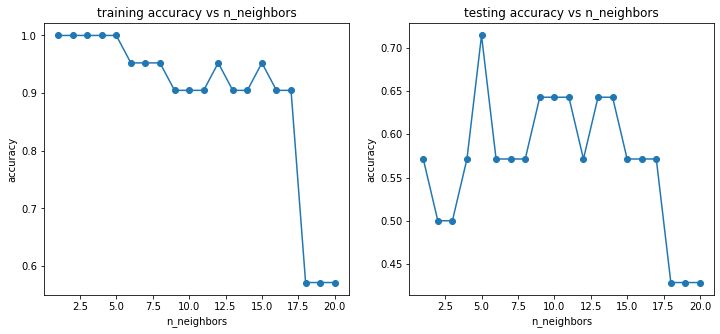

In [22]:
fig5 = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(n,accuracy_train,marker='o')
plt.title('training accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.subplot(122)
plt.plot(n,accuracy_test,marker='o')
plt.title('testing accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

plt.show()